# Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
X_train = pd.read_feather('data/processed/X_train_preprocessed.feather')
y_train = pd.read_feather('data/processed/y_train.feather')
data = pd.concat([X_train, y_train], axis=1)
data

,review,voted_up
0,apparently fault whenever dont save teammate t...,True
1,get level 20farm potsget 88 die 1 shock denial...,True
2,played game almost 1000 hour seen go good exce...,False
3,play havent heard high elvesif play,True
4,personally found game frustrating thing loved ...,False
...,...,...
58471,first game kind ever ever enjoyed something al...,True
58472,overall decent game early accesspro great buil...,True
58473,want great sniper moment realism game purchase...,True
58474,game warhammer reskin new racesunits marked im...,True


In [3]:
data.review[0]

'apparently fault whenever dont save teammate try 1v5 teambut honestly great game yeah sure mean thing buy real money way pay win smite game requires lot hard work communication team personally game wa easy pick hard master mean pro smite player decent computer nonpotato internet also helpful'

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58476 entries, 0 to 58475
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   review    58476 non-null  object
 1   voted_up  58476 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 514.1+ KB


## Total Vocabulary

In [5]:
total_vocabulary = []
for review in data['review'].tolist():
    total_vocabulary += review.split()

In [6]:
print('There are {} unique tokens in the dataset.'.format(len(set(total_vocabulary))))

There are 223823 unique tokens in the dataset.


## Frequency Distributuion

In [7]:
from nltk import FreqDist

In [9]:
data['voted_up'].value_counts(normalize=True)

True     0.805903
False    0.194097
Name: voted_up, dtype: float64

In [8]:
reviews_pos = data[data['voted_up']]['review']
reviews_neg = data[~data['voted_up']]['review']

In [64]:
vocab_pos = []
for review in reviews_pos.tolist():
    vocab_pos += review.split()

vocab_neg = []
for review in reviews_neg.tolist():
    vocab_neg += review.split()

In [65]:
freqdist_pos = FreqDist(vocab_pos)
top_20_pos = freqdist_pos.most_common(20)

freqdist_neg = FreqDist(vocab_neg)
top_20_neg = freqdist_neg.most_common(20)

In [ ]:
#####

In [55]:
words, values = list(zip(*top_20))
values_norm = tuple(v*100/len(data) for v in values)

In [56]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.style.use('seaborn-talk')

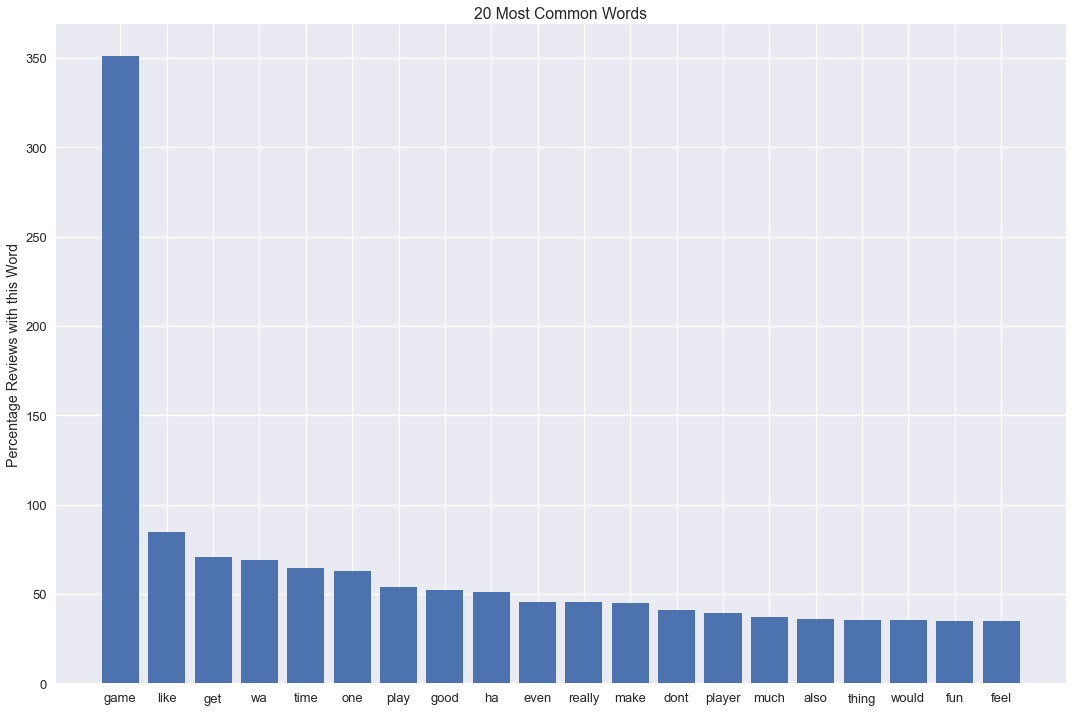

In [62]:
fig = plt.figure(figsize=(15, 10))
plt.bar(words, values_norm, figure=fig)
plt.ylabel('Percentage Reviews with this Word')
plt.title('20 Most Common Words')

plt.tight_layout()
plt.savefig('visualizations/frequence-distribution.png')
plt.show()

## Word Clouds

# PCA Scatterplot

In [ ]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

In [ ]:
display_pca_scatterplot(word_vectors, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

## LDA Topic Analysis

TODO:
- frequency distribution
- total vocab
- word clouds

comparative EDA - compare values in both classes

watch topic 39 video at around 52:00